## 3장허브




In [1]:
%matplotlib inline
import networkx as nx

Graph with 143 nodes and 623 edges


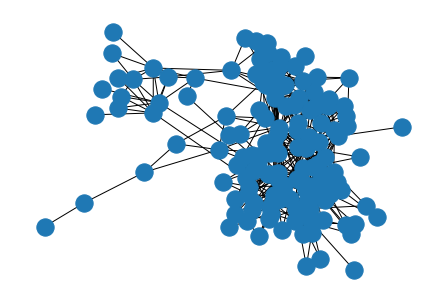

In [8]:
G = nx.read_edgelist('../ia-enron-only.edges', nodetype=int)
print(nx.info(G))
nx.draw(G)

In [9]:
max([1,2,3,4,5])

5

In [10]:
max(['apple', 'grape', 'carrot'])

'grape'

In [11]:
max(['apple', 'grape', 'carrot'], key=len)

'carrot'

In [12]:
highest_degree_node = max(G.nodes, key=G.degree)
highest_degree_node
# 노드G에서 가장 많은 연결선 수를 가진 노드

105

In [14]:
G.degree(highest_degree_node)
# 가장 높은 연결 수가 많은 노드의 연결선 수

42

#### 사이 중심점 
- 노드의 중심에 가까울 수록 사이중심도가 자주 개입
- 노드의 연결선 수와 중심도에는 상관관계가 있음
- 잘 연결되어 있을수록 중심도가 높음

In [13]:
betweenness = nx.centrality.betweenness_centrality(G)
#노드들의 딕셔너리 -> 사이 중심점 ( btweenness )
highest_betweenness_node = max(G.nodes, key=betweenness.get)
highest_betweenness_node

105

In [15]:
betweenness[highest_betweenness_node]

0.19400604344556296

In [17]:
degree_sequence = [G.degree(n) for n in G.nodes]
# degree_sequence : 노드의 연결수 값을 가짐

In [18]:
import statistics

print('Mean degree:', statistics.mean(degree_sequence))
print('Median degree:', statistics.median(degree_sequence))

Mean degree: 8.713286713286713
Median degree: 8


In [19]:

betweenness = nx.centrality.betweenness_centrality(G)
betweenness_sequence = list(betweenness.values())

print('Mean betweenness:', statistics.mean(betweenness_sequence))
print('Median betweenness:', statistics.median(betweenness_sequence))

Mean betweenness: 0.013950388838012454
Median betweenness: 0.0037492834763570323


In [20]:
from collections import Counter

degree_counts = Counter(degree_sequence)
degree_counts

#연결선 수마다 노드 개수 카운팅

Counter({30: 1,
         2: 16,
         17: 5,
         12: 5,
         13: 3,
         16: 5,
         10: 9,
         11: 10,
         18: 3,
         20: 1,
         15: 3,
         19: 2,
         7: 9,
         14: 6,
         9: 16,
         42: 1,
         8: 6,
         5: 8,
         6: 7,
         1: 6,
         4: 11,
         23: 1,
         3: 9})

In [21]:
min_degree, max_degree = min(degree_counts.keys()), max(degree_counts.keys())

plot_x = list(range(min_degree, max_degree + 1))

In [24]:
plot_y = [degree_counts.get(x, 0) for x in plot_x]

<BarContainer object of 42 artists>

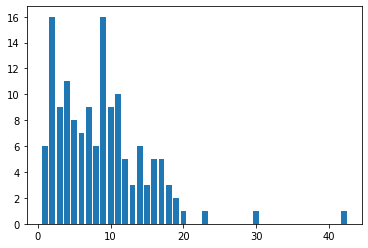

In [25]:
import matplotlib.pyplot as plt

plt.bar(plot_x, plot_y)

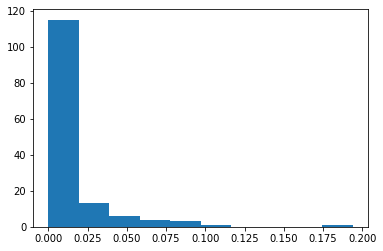

In [26]:
counts, bins, patches = plt.hist(betweenness_sequence, bins=10)

In [27]:
bins

array([0.        , 0.0194006 , 0.03880121, 0.05820181, 0.07760242,
       0.09700302, 0.11640363, 0.13580423, 0.15520483, 0.17460544,
       0.19400604])

In [28]:
counts

array([115.,  13.,   6.,   4.,   3.,   1.,   0.,   0.,   0.,   1.])

#### 견고성
- 링크의 손실이 시스템의 전체적 연결성에 어떤 영향을 미치는지 관찰하는 것

In [29]:
nx.connected_components(G)

<generator object connected_components at 0x7f5431830950>

In [30]:
core = next(nx.connected_components(G))
core

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143}

In [31]:
len(core)

143

In [32]:
components = list(nx.connected_components(G))

In [33]:
C = G.copy()

In [34]:
import random

nodes_to_remove = random.sample(list(C.nodes), 2)
C.remove_nodes_from(nodes_to_remove)
#무작위로 삭제해보기 위해 노드의 이름과 상관없이 무작위로 샘플링

In [35]:
number_of_steps = 25
M = G.number_of_nodes() // number_of_steps
M

5

- M개의 노드를 임의로 선택하고 제거
- M개 미만의 노드가 있을 때까지 반복
- 25개 단계까지 진행

In [36]:
num_nodes_removed = range(0, G.number_of_nodes(), M)
# 각 단계에서 제거된 총 노드 수의 시퀀스를 생성

In [37]:
N = G.number_of_nodes()
C = G.copy()
random_attack_core_proportions = []
for nodes_removed in num_nodes_removed:
    # Measure the relative size of the network core
    core = next(nx.connected_components(C))
    core_proportion = len(core) / N
    random_attack_core_proportions.append(core_proportion)
    
    # If there are more than M nodes, select M nodes at random and remove them
    if C.number_of_nodes() > M:
        nodes_to_remove = random.sample(list(C.nodes), M)
        C.remove_nodes_from(nodes_to_remove)
  
# 각 단계에서 제거된 총 노드 수의 시퀀스를 생성

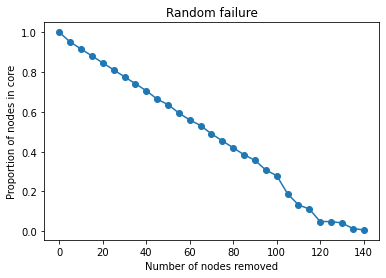

In [38]:
plt.title('Random failure')
plt.xlabel('Number of nodes removed')
plt.ylabel('Proportion of nodes in core')
plt.plot(num_nodes_removed, random_attack_core_proportions, marker='o')

In [39]:
nodes_sorted_by_degree = sorted(G.nodes, key=G.degree, reverse=True)
top_degree_nodes = nodes_sorted_by_degree[:M]
top_degree_nodes

# 중심노드를 찾기 위해 지웠을 때 많이 지워지는 노드를 정렬

[105, 17, 95, 48, 132]

In [40]:
N = G.number_of_nodes()
number_of_steps = 25
M = N // number_of_steps

num_nodes_removed = range(0, N, M)
C = G.copy()
targeted_attack_core_proportions = []
for nodes_removed in num_nodes_removed:
    # Measure the relative size of the network core
    core = next(nx.connected_components(C))
    core_proportion = len(core) / N
    targeted_attack_core_proportions.append(core_proportion)
    
    # If there are more than M nodes, select top M nodes and remove them
    if C.number_of_nodes() > M:
        nodes_sorted_by_degree = sorted(C.nodes, key=C.degree, reverse=True)
        nodes_to_remove = nodes_sorted_by_degree[:M]
        C.remove_nodes_from(nodes_to_remove)

# 무작위로 삭제가 아닌 선별된 노드( 중심노드로 예상되는 ) 먼저 삭제

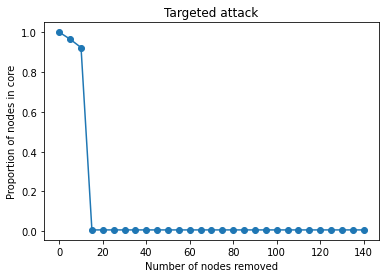

In [41]:
plt.title('Targeted attack')
plt.xlabel('Number of nodes removed')
plt.ylabel('Proportion of nodes in core')
plt.plot(num_nodes_removed, targeted_attack_core_proportions, marker='o')

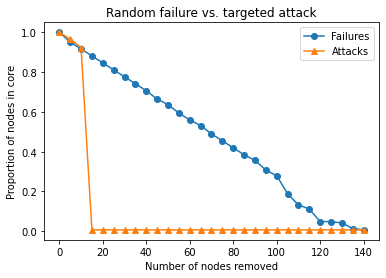

In [42]:
plt.title('Random failure vs. targeted attack')
plt.xlabel('Number of nodes removed')
plt.ylabel('Proportion of nodes in core')
plt.plot(num_nodes_removed, random_attack_core_proportions, marker='o', label='Failures')
plt.plot(num_nodes_removed, targeted_attack_core_proportions, marker='^', label='Attacks')
plt.legend()